In [7]:
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp
import pandas as pd
from astropy import units as u
import sklearn.cluster as sclust
import sklearn.metrics as smet
import scipy.optimize as optimize
from astropy.coordinates import SkyCoord
import seaborn
from scipy.integrate import quad
from scipy.integrate import romberg 
from iminuit import Minuit
from iminuit import minimize
from SN_distribution import SkyMap
from SN_distribution import Patching_Map
from Selections import Criteria_selection
from Selections import Good_sampling
from Selections import salt_2_selection
from Hubble import Hubble_fit
from Hubble import Hubble_fit_patch
from applySelection import select_end
from applyFit import FIT
import csv

In [8]:
df_SNeIa = pd.read_pickle('input/sim30001/salt2_fit_lc.pkl')
df_SNeIa

,name,zhelio,zcmb,ra,dec,x0,sig_x0,x1,sig_x1,c,sig_c,t0,sig_t0,chi,ndof,mb,cov,cov_mb,a_v
0,ZTF10000,0.074806,0.074093,41.786034,25.620126,0.001064,0.000035,-0.615510,0.141024,-0.163419,0.030900,59159.256684,0.122935,53.142578,56,18.070927,"[[0.015113085456246065, -7.446447041029259e-07...","[[0.0013138833922161342, 0.00146495126762707, ...",0.496864
1,ZTF10001,0.084743,0.085202,103.845513,18.513585,0.000479,0.000018,-0.226932,0.173812,0.034813,0.032833,58775.907964,0.143728,388.268465,400,18.937148,"[[0.020657680641757423, -4.961942679130373e-07...","[[0.0015835895350537678, 0.002458934449242768,...",0.201810
2,ZTF10004,0.101999,0.103127,185.162719,8.989573,0.000397,0.000012,0.934625,0.301933,-0.017956,0.030773,58276.534954,0.190223,55.903262,53,19.141039,"[[0.03618498611381211, -1.407230710476957e-07,...","[[0.0010622511732943456, 0.0017277008402404356...",0.056100
3,ZTF1002,0.010004,0.011154,188.250613,-12.121206,0.031265,0.002288,-2.062247,0.161972,-0.043644,0.048047,58826.772923,0.593786,5.665264,19,14.400379,"[[0.3525902875220334, -0.000877526802816246, 0...","[[0.006284378283951687, 0.007861085667785647, ...",0.145129
4,ZTF10032,0.079159,0.079849,112.915312,3.433531,0.000449,0.000024,-1.047752,0.314172,0.090798,0.041005,58849.314291,0.607542,46.848742,43,19.006821,"[[0.36911477740500886, -9.306909731139638e-06,...","[[0.003368073598062428, 0.005682276013084387, ...",0.170503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3959,ZTF9959,0.054777,0.055726,207.619044,-4.884332,0.001182,0.000055,-0.687002,0.178548,-0.054221,0.032647,58933.512882,0.698346,16.861134,17,17.956221,"[[0.487700743077774, -2.7435213670106867e-05, ...","[[0.0025056086759848964, -6.38332574938481e-05...",0.077457
3960,ZTF9970,0.141479,0.140587,9.179703,46.365522,0.000243,0.000047,-1.479606,0.830422,-0.195068,0.147387,58261.378991,0.002993,41.877311,37,19.674903,"[[8.955345029577967e-06, -1.8162121500284677e-...","[[0.04410283206742088, 0.14263182138183556, 0....",0.281456
3961,ZTF9975,0.083675,0.082703,312.595470,23.730742,0.000720,0.000041,0.243361,0.366680,-0.036193,0.048405,58942.298404,0.000104,20.710672,33,18.494489,"[[1.0908450926303014e-08, -8.029134500665736e-...","[[0.0038111051250814343, 0.011769721306983137,...",0.523238
3962,ZTF9986,0.086057,0.086879,213.742188,8.101021,0.000405,0.000054,2.253815,0.501096,0.267380,0.095881,58435.804645,0.852067,41.242940,52,19.113425,"[[0.7260750144492035, -1.954583952840583e-05, ...","[[0.019987531315216706, 0.03294902569095379, 0...",0.073463


/Users/antoine/Documents/newCode/SN_distribution.py:416: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'ncluster'] = ''


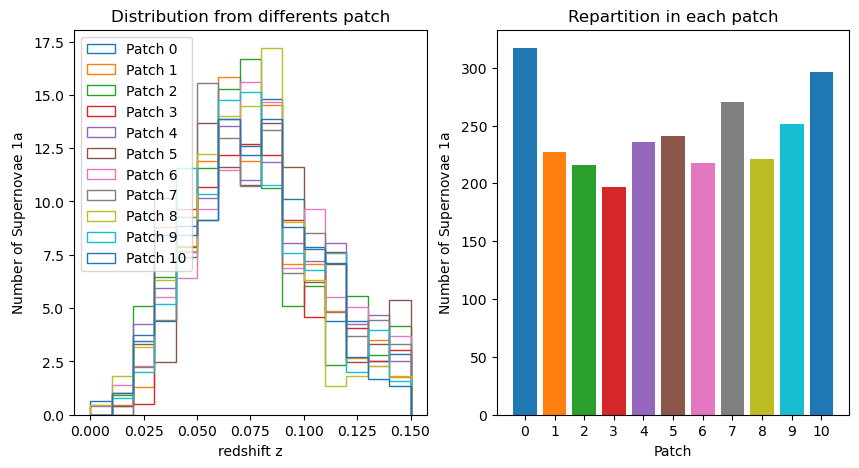

In [3]:
selct = select_end(df_SNeIa)
selct.allSelct(n = 1, method = 'clustering', N_patch = 11, N_resol = 1, H0 = 70)

In [4]:
df = pd.read_pickle('output/selection_data_3years(30001)_clust.pkl')
df

,index,name,zhelio,zcmb,ra,dec,x0,sig_x0,x1,sig_x1,...,sig_t0,chi,ndof,mb,cov,cov_mb,a_v,flag_cosmo,ncluster,sig_i
0,492,ZTF13373,0.006465,0.005373,15.460922,8.895293,0.118037,0.003438,0.416390,0.022572,...,0.029051,13.985131,90,12.956222,"[[0.0008439425671892478, 3.208801811954722e-05...","[[0.0009712765212747489, -0.000273409191137459...",0.104409,0,0,0.005896
1,471,ZTF13276,0.008321,0.007290,18.540718,21.690175,0.047750,0.001444,-0.683576,0.028249,...,0.033747,20.174878,110,13.936621,"[[0.0011388733039179833, 1.1610444489509942e-0...","[[0.0010326449725207914, -0.000123303661967458...",0.107055,0,0,0.00595
2,2870,ZTF29721,0.008601,0.007758,27.644462,-18.636596,0.063006,0.001856,0.069168,0.032132,...,0.047871,6.498710,63,13.639098,"[[0.0022916314841758515, 2.065624246025413e-05...","[[0.001006661439525993, -0.0001447371791970758...",0.038534,0,4,0.005857
3,3532,ZTF7115,0.009614,0.008473,330.175321,-6.059608,0.070905,0.002149,-0.956704,0.078815,...,0.085518,5.295529,40,13.511368,"[[0.007313372901572126, 1.388566702135789e-05,...","[[0.0010758248743494487, -5.7953654198141824e-...",0.100799,0,8,0.006441
4,2910,ZTF29974,0.008486,0.008505,255.981722,8.714763,0.048446,0.001435,-0.212330,0.027265,...,0.040120,21.028750,56,13.923319,"[[0.00160959184277633, 8.092218112179527e-06, ...","[[0.001006984023445339, -0.0001329707753871131...",0.246275,0,1,0.005618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2685,3434,ZTF6545,0.149287,0.149374,246.004887,42.259158,0.000136,0.000004,-1.955165,0.149176,...,0.116907,339.470553,322,20.305006,"[[0.01366716982263995, -4.386265865803818e-09,...","[[0.0011958866675613026, 0.0007062749451317079...",0.021359,0,7,0.012374
2686,258,ZTF11836,0.150065,0.149615,298.386447,66.676498,0.000141,0.000007,-0.930278,0.280403,...,0.320096,128.646363,126,20.266982,"[[0.1024621424088765, -6.999747075003793e-07, ...","[[0.002739646381954106, 0.006533459977188719, ...",0.466198,0,7,0.025526
2687,3276,ZTF5499,0.148704,0.149651,176.871375,31.782693,0.000239,0.000008,1.932061,0.152926,...,0.133240,128.561383,157,19.692955,"[[0.017752830261132047, -3.423244103407567e-08...","[[0.0011955910938826289, 0.0014080510143138613...",0.055308,0,5,0.011743
2688,3628,ZTF7639,0.150056,0.149736,276.113270,59.949758,0.000115,0.000004,-1.820183,0.172727,...,0.156469,380.500340,415,20.487667,"[[0.02448246374167207, -5.5398187099511423e-08...","[[0.0013220815018287746, 0.0012979638870141224...",0.117221,0,7,0.014806


In [5]:
fit = FIT(df)
delta_H0 = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
with open('output/Sensi_test.csv', 'w') as f:
    writer = csv.writer(f)
    headers = ["Sim", "Mean", "std"]
    writer.writerow(headers)
with open('output/res.csv', 'w') as f:
    writer = csv.writer(f)
    headers = ["n_dip", "Sim", "ra_in", "dec_in", "delta_H0", "Errors", "ra", "dec"]
    writer.writerow(headers)
fit.analysis(H0 = 70, delta_H0 = delta_H0, method = 'clustering', 
             n = 1, n_dip = 1, N_patch = 11, N_resol = 1, anisotropies = True, 
             theta_dip = 2 * np.pi/3, phi_dip = 3 * np.pi/2, 
             delta_H0_dip = 5, H0_dip = 70, filename = 'output/Sensi_test.csv', filename_residu = 'output/res.csv')

/Users/antoine/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
0.0 180.0 -180.0 180.0


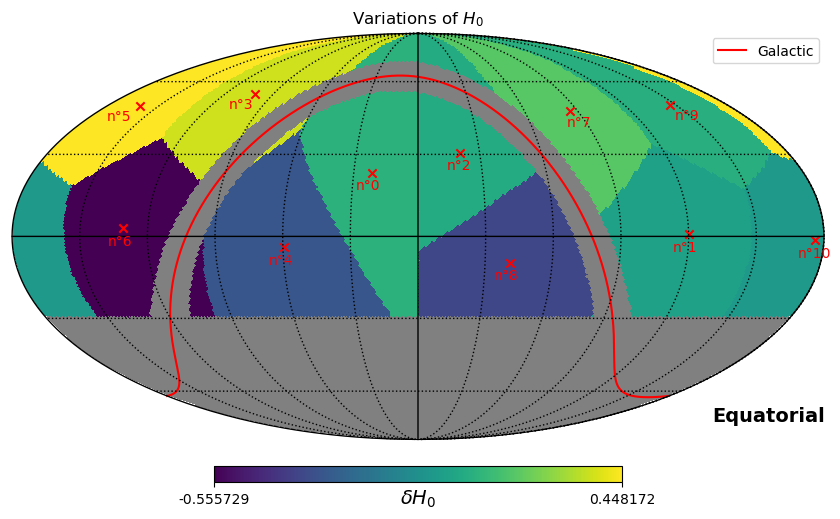

In [6]:
centers = pd.read_csv('output/centers_clust(30001).csv', header = None)
F_df = pd.read_csv('output/Fit_clust_1.csv')
fit.map_delta_H0(centers = centers, val = F_df['values'], N_clust = 11, coord = ['C'],
                 method = 'clustering', N_resol = 1)

In [7]:
GF_df = pd.read_csv('output/GF_clust_1.csv')
color = ["blue", "green", "c", "y", "m", "olive", "purple", "brown", "pink", "orange", "lime"]
fit.plt_H0(cov = F_df['errors'], H0 = 70, val = F_df['values'], N_clust = 11, val_global = GF_df['values'], color = color)

TypeError: __init__() missing 1 required positional argument: 'N_patch'

In [ ]:
df_F = pd.read_pickle('output/df_F(30001)_clust.pkl')
fit.HD_per_patch(df = df_F, H0 = 70, val_global = GF_df['values'], N_clust = 11, color = color)

In [ ]:
fit.plt_standardization(df = df_F)

In [ ]:
3 * np.pi/2 - np.pi

In [ ]:
np.degrees(-1.585)